     yearID teamID  total_payroll franchID      W      G  winning_percentage
0      1985    ATL     14807000.0      ATL   66.0  162.0           40.740741
1      1985    BAL     11560712.0      BAL   83.0  161.0           51.552795
2      1985    BOS     10897560.0      BOS   81.0  163.0           49.693252
3      1985    CAL     14427894.0      ANA   90.0  162.0           55.555556
4      1985    CHA      9846178.0      CHW   85.0  163.0           52.147239
5      1985    CHN     12702917.0      CHC   77.0  162.0           47.530864
6      1985    CIN      8359917.0      CIN   89.0  162.0           54.938272
7      1985    CLE      6551666.0      CLE   60.0  162.0           37.037037
8      1985    DET     10348143.0      DET   84.0  161.0           52.173913
9      1985    HOU      9993051.0      HOU   83.0  162.0           51.234568
10     1985    KCA      9321179.0      KCR   91.0  162.0           56.172840
11     1985    LAN     10967917.0      LAD   95.0  162.0           58.641975

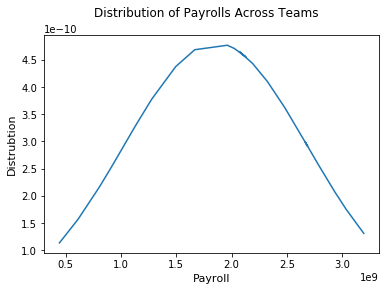

This plot displays the distrubution of payrolls from 1990 -2014


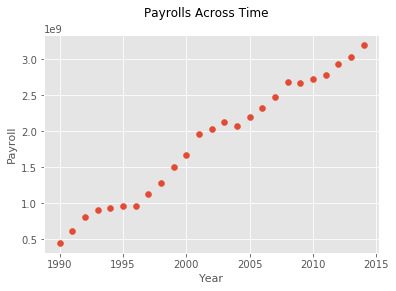

This plot displays the total payroll of all teams from 1990-2014
This scatterplot is used to display that there is steady increase of overall payroll through the years


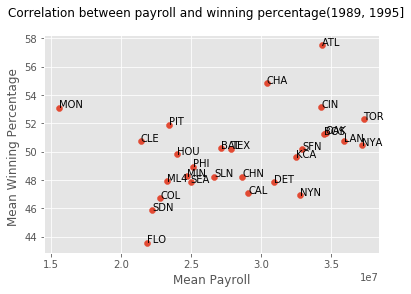

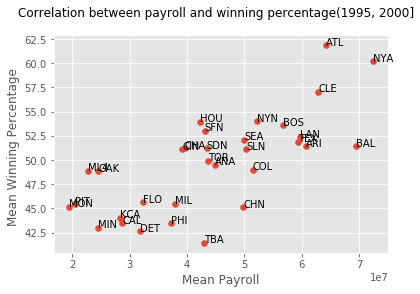

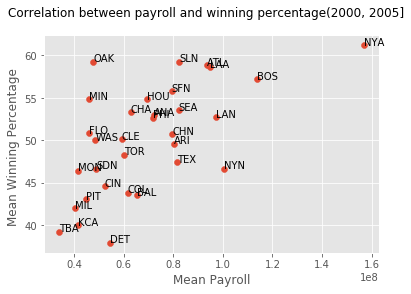

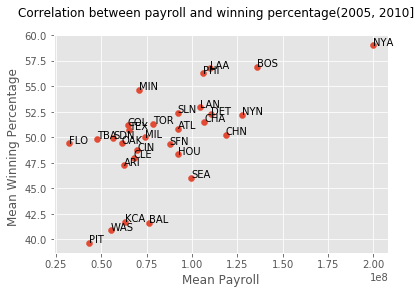

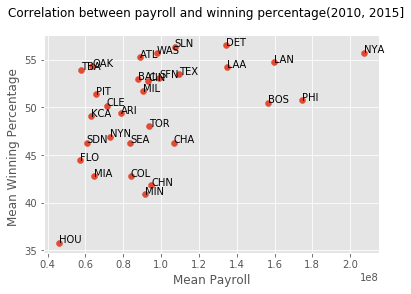

These  plot displays each teams  mean payroll on the x-axis and winning percentage on the y-axis
These plots are used to see the correlation between payroll and winning percentage
     yearID teamID  total_payroll franchID  std_payroll      W      G  \
0      1985    ATL     14807000.0      ATL     1.914905   66.0  162.0   
1      1985    BAL     11560712.0      BAL     0.601068   83.0  161.0   
2      1985    BOS     10897560.0      BOS     0.332678   81.0  163.0   
3      1985    CAL     14427894.0      ANA     1.761474   90.0  162.0   
4      1985    CHA      9846178.0      CHW    -0.092838   85.0  163.0   
5      1985    CHN     12702917.0      CHC     1.063341   77.0  162.0   
6      1985    CIN      8359917.0      CIN    -0.694357   89.0  162.0   
7      1985    CLE      6551666.0      CLE    -1.426192   60.0  162.0   
8      1985    DET     10348143.0      DET     0.110318   84.0  161.0   
9      1985    HOU      9993051.0      HOU    -0.033395   83.0  162.0   
10     1985    KC

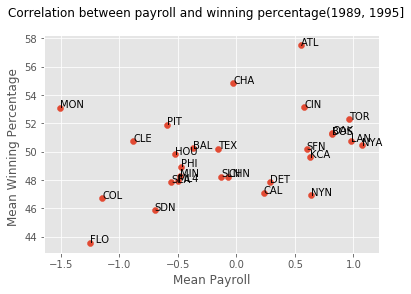

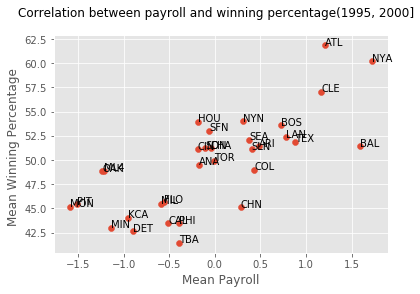

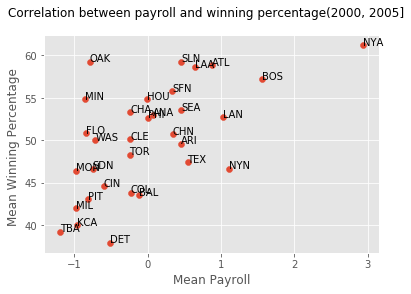

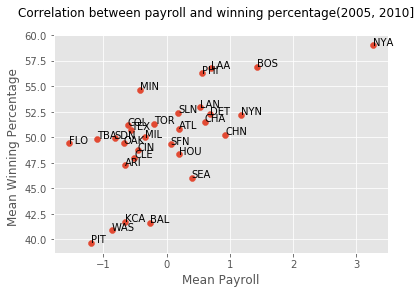

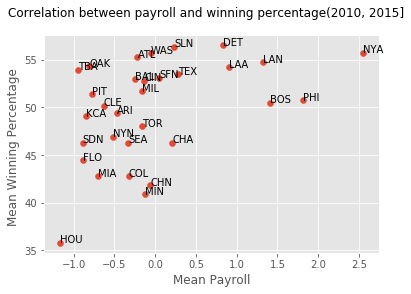

This  plot displays each teams  mean standardized payroll on the x-axis and expected winning percentage on the y-axis
This plot used to show that teams that spend above the standard devation of the payroll are expected to win more than 50% of the time
while teams that spend below standard deviation  payroll are expected to win less than 50% of the time


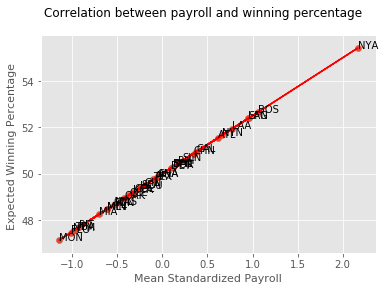

This  plot displays the spending efficiency of teams over team.On the x-axis is the year and spending efficency on the y-axis


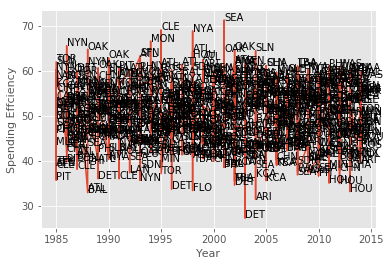

In [1]:
import sqlite3
import pandas
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.close('all')

#Part 1: Wrangling

## Problem 1 

## This section of code uses sqlite3 to wrangle data from the lahman2014 sql lite database.
## first the Salary and Team table are queried to wrangle data needed to find the total payroll and winning percentage 
## for each team and year pair.Next pandas read_sql command is used to convert the requested information into a dataframe.
#  Lastly, I merged the table containing the overall salaries and win percentage left.

conn = sqlite3.connect('lahman2014.sqlite')

salary_query = "SELECT yearID,teamID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID,yearId"

win_query = "SELECT yearID,teamID,franchID,W,G,(W*1.0/G)*100 as winning_percentage FROM Teams GROUP BY teamID,yearId"

cum_query = "SELECT yearID,sum(salary) as total_payroll FROM Salaries  WHERE yearID >1989 GROUP BY yearID"


team_salaries = pandas.read_sql(salary_query, conn)
year_salaries = pandas.read_sql(cum_query, conn)



team_winning = pandas.read_sql(win_query, conn)


team_cum = team_salaries.merge(team_winning, how='left')

print(team_cum)
#  I dealt with missing data in the table by I merge the tables left because the salary information 
#  for teams is not provide for dates before 1985 while team information such as wins and losses begins much 
#  earlier




#Part 2: Exploratory Data Analysis
##Payroll Distribution


#Problem 2
## The code below creates a graph which represents the distrubtion of payrolls 
## across teams conditioned on time (from 1990-2014). This is done by using numpy to find the standard deviation
## and mean of the cumalative salaries each year. Next scipy.stats is used to create a normal distrubtion of the information
## Finally mathplotlib is used to plot the distrubution.

year_sal = year_salaries['total_payroll']
sal_mean = np.mean(year_sal)
sal_std = np.std(year_sal)


correlation_fig = plt.figure()
pdf = stats.norm.pdf(year_sal,sal_mean, sal_std)
plt.plot(year_sal, pdf) 

correlation_fig.suptitle('Distribution of Payrolls Across Teams', fontsize=12)
plt.xlabel('Payroll', fontsize=11)
plt.ylabel('Distrubtion', fontsize=11)

plt.show()
print('This plot displays the distrubution of payrolls from 1990 -2014')



##Question 1
##  Looking at information it is clear that there is a trend that the total payroll
## increases each year

#Problem 3
## The code below creates a graph which represents the trend of salaries increasing per year
## This is accomplished by simply creating a scatter plot which plots
## the total payroll for each year using mathplotlib


correlation_fig = plt.figure()
plt.style.use('ggplot')
plt.scatter(year_salaries['yearID'],year_salaries['total_payroll'])
correlation_fig.suptitle('Payrolls Across Time', fontsize=12)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Payroll', fontsize=11)
plt.show()
print('This plot displays the total payroll of all teams from 1990-2014')
print('This scatterplot is used to display that there is steady increase of overall payroll through the years')


#Correlation between payroll and winning percentage
##Problem 4

## The code below uses pandas.cut in order to break the data into 5 different time periods.
## As well as matplotlib in order to create five different scatter plots which 
## try to show a correlation between payrol and winning percentage.A for loop is
## then used to plot a scatterplot for each of the 5 time periods.


team_cum['yearbins'] = pandas.cut(team_cum['yearID'],[1989,1995,2000,2005,2010,2015])

yearbins = team_cum.groupby(['yearbins'])

for i,group in yearbins:
    
    correlation_fig = plt.figure()
    
    curr_group = group.groupby('teamID',as_index=False).mean()
    
    
    total_pay = curr_group['total_payroll']
    win_per = curr_group['winning_percentage']
    team_label = curr_group['teamID']
    
    
    
    
    plt.scatter(total_pay,win_per)
    correlation_fig.suptitle('Correlation between payroll and winning percentage' + str(i), fontsize=12)
      
    for i, txt in enumerate(team_label):
        plt.annotate(txt, (total_pay[i],win_per[i]))
    
    

    plt.xlabel('Mean Payroll', fontsize=12)
    plt.ylabel('Mean Winning Percentage ', fontsize=12)
    
   

plt.show()
print('These  plot displays each teams  mean payroll on the x-axis and winning percentage on the y-axis')
print('These plots are used to see the correlation between payroll and winning percentage')
plt.close('all')

#Question 2
## When comparing the bin graphs it is easy to see that the total payroll for each team is increasing.You can also see
## that the teams who spend more money are more likely to have a higher winning percentage.Although there are some expections to the trend
## forexample in the 2000-2005 bin there is a team who spent very little money but still had a 60% winning percentage. They NYA and BOS
## consistently pay the most in salries and have the highest winning average


#  The Oakland A's spending is very efficent.Although the Oakland A's spend much less money on salaries compared
#  to the other teams they still maintained over a 60% winning percentage for the 2000-2005 time frame. Even though after
#  2005 the winning percentage decreases it is still much higher than teams that spend a similar amount




##Part 3: Data transformations

##Problem 5


## The code below computes the mean salary and the std deviation of the salaries 
## for each  year.Then iterated through every row and normalized the payroll for each year using the
## given equation.Then appended the resulting column into the already exisiting dataframe 

avg_salary = team_cum.groupby('yearID').mean()
std_salary = team_cum.groupby('yearID').std()

std_payroll = []


for index,row in team_cum.iterrows():
    payroll = row[2]
    avg_pay =  avg_salary.get_value(row[0], 'total_payroll')
    std_pay =  std_salary.get_value(row[0], 'total_payroll')
    std_payroll.append((payroll - avg_pay)/std_pay)
    
  

team_cum.insert(4,'std_payroll',std_payroll)
print(team_cum)

##Problem 6

##The code below works the same as the code for problem #4 except the total_payroll is replaced
## by the standard payroll

for i,group in yearbins:
    
    correlation_fig = plt.figure()
    
    curr_group = group.groupby('teamID',as_index=False).mean()
    
    
    total_pay = curr_group['std_payroll']
    win_per = curr_group['winning_percentage']
    team_label = curr_group['teamID']
    
    
    
    
    plt.scatter(total_pay,win_per)
    correlation_fig.suptitle('Correlation between payroll and winning percentage' + str(i), fontsize=12)
      
    for i, txt in enumerate(team_label):
        plt.annotate(txt, (total_pay[i],win_per[i]))
    
    

    plt.xlabel('Mean Payroll', fontsize=12)
    plt.ylabel('Mean Winning Percentage ', fontsize=12)
  


print('These  plot displays each teams  mean standardized payroll on the x-axis and winning percentage on the y-axis')
print('The plots are used to see the correlation between standardized payroll and winning percentage')
plt.show()
plt.close('all')


##Question 3

## The distribution of payrolls using the standarized payroll shows a trend of 
## as the payroll increases so does the winning percentage.The standarized plots also
## shows that teams who spend above 1 standard deviation of the payroll seem to have above a 50% win average 
## and teams that spend below 1 standard deviation of the payroll have a less than 50% win average.


#Expected wins

##Problem 7

## The code below creates a scatter plot which displays the standarized payroll 
## for every team and  year combination. The expected win percentage is calculated for every


std_win_percentage = []

for index,row in team_cum.iterrows():

    std_win_percentage.append(50 + 2.5 * row[4] )
    
  

team_cum.insert(5,'std_win',std_win_percentage)



over_time_group = team_cum.groupby('teamID',as_index=False).mean()
total_pay = over_time_group['std_payroll']
win_per = over_time_group['std_win']
team_label = over_time_group['teamID']
    
fit = np.polyfit(total_pay,win_per, deg=1)

correlation_fig = plt.figure()
plt.plot(total_pay, fit[0] * total_pay + fit[1], color='red')
plt.scatter(total_pay,win_per)
correlation_fig.suptitle('Correlation between payroll and winning percentage', fontsize=12)

for i, txt in enumerate(team_label):
        plt.annotate(txt, (total_pay[i],win_per[i]))
    
    
plt.xlabel('Mean Standardized Payroll', fontsize=11)
plt.ylabel('Expected Winning Percentage ', fontsize=11)
print('This  plot displays each teams  mean standardized payroll on the x-axis and expected winning percentage on the y-axis')
print('This plot used to show that teams that spend above the standard devation of the payroll are expected to win more than 50% of the time')
print('while teams that spend below standard deviation  payroll are expected to win less than 50% of the time')
plt.show()


##Problem 8

efficency  = []
for index,row in team_cum.iterrows():

    efficency.append(row[8] - row[4] )
    
    
team_cum.insert(6,'efficency',efficency)

total_pay = team_cum['std_payroll']
eff = team_cum['efficency']
team_label = team_cum['teamID']
year_label = team_cum['yearID']
    

        
plt.plot(year_label,eff);
for i, txt in enumerate(team_label):
      plt.annotate(txt, (year_label[i],eff[i]))

plt.xlabel('Year', fontsize=11)
plt.ylabel('Spending Effciency', fontsize=11)

print('This  plot displays the spending efficiency of teams over team.On the x-axis is the year and spending efficency on the y-axis')
     
plt.show()


##Question 4

## During the moneyball period the OAK was the most spending efficient team by far
## It was surpising that SEA was the most spending efficient team in the early 2000's because that it
## not something that stood out to me in the other graphs. Another interesting occurance was that around 2010-2015
## HOU was one of the least spending efficent teams and had a mean percentage less than 35%